# Random Forest Regression
## Import Libraries

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor

## Load data

In [5]:
data = pd.read_csv("Position_Salaries.csv")
X = data.iloc[:, 1:2].values
y = data.iloc[:, -1].values

## Training the Random Forest Regression Model

In [6]:
reg = RandomForestRegressor(n_estimators=10, random_state=0)
reg.fit(X, y)

RandomForestRegressor(n_estimators=10, random_state=0)

## Prediction Results

In [7]:
reg.predict([[6.5]])

array([167000.])

## Visulizing the model


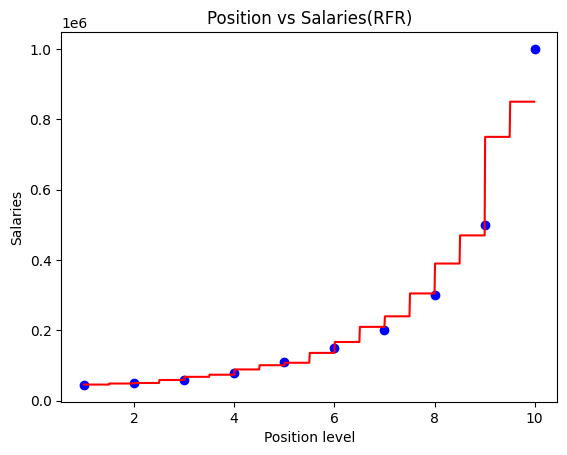

In [9]:
X_grid = np.arange(X.min(),X.max(),0.01)
X_grid = X_grid.reshape(-1,1)
plt.scatter(X, y, color='blue', label='read data')
plt.plot(X_grid, reg.predict(X_grid), color='red',label='Prediction')
plt.title("Position vs Salaries(RFR)")
plt.xlabel('Position level')
plt.ylabel('Salaries')
plt.show()

## GridSearchCV

In [10]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators':[10, 50, 100, 300],
    'max_depth':[None, 5, 10, 20],
    'min_samples_split': [2, 5, 10]
}
grid_search = GridSearchCV(RandomForestRegressor(random_state=0), param_grid, cv=5)
grid_search.fit(X, y)

print('Best Parameters:', grid_search.best_params_)

Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 10}


## Feature Importance visualization

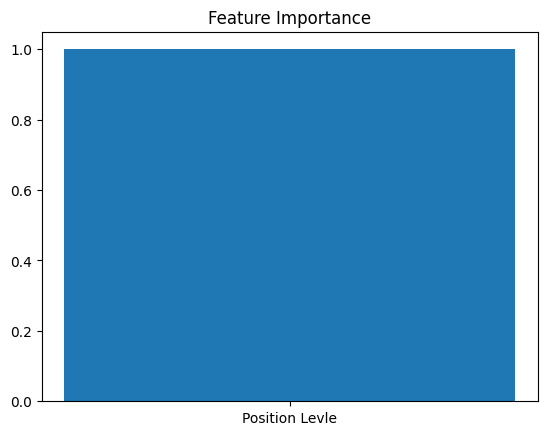

In [11]:
importances = reg.feature_importances_
plt.bar(['Position Levle'], importances)
plt.title('Feature Importance')
plt.show()

## R^2 model estimation

In [12]:
from sklearn.metrics import r2_score

y_train_pred = reg.predict(X)
print('Training R^2 score:', r2_score(y, y_train_pred))

Training R^2 score: 0.9704434230386582
